## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
from tensorflow import keras
import itertools

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""
# Enable GPU 0
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = keras.layers.ReLU()(x)
        else:
            x = keras.layers.Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = keras.layers.ReLU()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bs in BATCH_SIZE:
    keras.backend.clear_session     # 把舊的 Graph 清掉
    print(f"BATCH_SIZE:{bs}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()    

    opt = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer=opt)
    model.fit(x_train, y_train, 
              epochs=EPOCHS,
              batch_size=bs,
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "bs:%s " % (str(bs))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc} 

BATCH_SIZE:2
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)        

Epoch 44/50
25000/25000 [==============================] - 159s 6ms/step - loss: 2.2032 - accuracy: 0.1836 - val_loss: 2.2905 - val_accuracy: 0.2394
Epoch 45/50
25000/25000 [==============================] - 159s 6ms/step - loss: 2.2051 - accuracy: 0.1820 - val_loss: 2.3653 - val_accuracy: 0.2331
Epoch 46/50
25000/25000 [==============================] - 160s 6ms/step - loss: 2.2085 - accuracy: 0.1816 - val_loss: 2.3022 - val_accuracy: 0.2278
Epoch 47/50
25000/25000 [==============================] - 161s 6ms/step - loss: 2.2021 - accuracy: 0.1864 - val_loss: 2.3932 - val_accuracy: 0.2218
Epoch 48/50
25000/25000 [==============================] - 160s 6ms/step - loss: 2.1994 - accuracy: 0.1864 - val_loss: 2.3730 - val_accuracy: 0.2188
Epoch 49/50
25000/25000 [==============================] - 159s 6ms/step - loss: 2.2059 - accuracy: 0.1812 - val_loss: 2.4106 - val_accuracy: 0.2177
Epoch 50/50
25000/25000 [==============================] - 163s 7ms/step - loss: 2.1992 - accuracy: 0.1842

3125/3125 [==============================] - 21s 7ms/step - loss: 0.5839 - accuracy: 0.7941 - val_loss: 1.6978 - val_accuracy: 0.5368
Epoch 38/50
3125/3125 [==============================] - 21s 7ms/step - loss: 0.5726 - accuracy: 0.7947 - val_loss: 1.7370 - val_accuracy: 0.5241
Epoch 39/50
3125/3125 [==============================] - 21s 7ms/step - loss: 0.5635 - accuracy: 0.8001 - val_loss: 1.7709 - val_accuracy: 0.5329
Epoch 40/50
3125/3125 [==============================] - 21s 7ms/step - loss: 0.5515 - accuracy: 0.8027 - val_loss: 1.8237 - val_accuracy: 0.5266
Epoch 41/50
3125/3125 [==============================] - 21s 7ms/step - loss: 0.5400 - accuracy: 0.8108 - val_loss: 1.9779 - val_accuracy: 0.5123
Epoch 42/50
3125/3125 [==============================] - 21s 7ms/step - loss: 0.5281 - accuracy: 0.8116 - val_loss: 1.9034 - val_accuracy: 0.5156
Epoch 43/50
3125/3125 [==============================] - 21s 7ms/step - loss: 0.5295 - accuracy: 0.8132 - val_loss: 1.8128 - val_accurac

Epoch 31/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3754 - accuracy: 0.8664 - val_loss: 2.1948 - val_accuracy: 0.5011
Epoch 32/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3586 - accuracy: 0.8735 - val_loss: 2.2227 - val_accuracy: 0.5053
Epoch 33/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.3513 - accuracy: 0.8747 - val_loss: 2.4170 - val_accuracy: 0.4916
Epoch 34/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3418 - accuracy: 0.8789 - val_loss: 2.2445 - val_accuracy: 0.5155
Epoch 35/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.3359 - accuracy: 0.8801 - val_loss: 2.5263 - val_accuracy: 0.4888
Epoch 36/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3206 - accuracy: 0.8839 - val_loss: 2.3664 - val_accuracy: 0.5048
Epoch 37/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3223 - accuracy: 0.8855 - val_loss: 2.3394 -

Epoch 25/50
391/391 [==============================] - 5s 12ms/step - loss: 0.1975 - accuracy: 0.9312 - val_loss: 2.6825 - val_accuracy: 0.4773
Epoch 26/50
391/391 [==============================] - 4s 11ms/step - loss: 0.1968 - accuracy: 0.9310 - val_loss: 2.9523 - val_accuracy: 0.4668
Epoch 27/50
391/391 [==============================] - 5s 12ms/step - loss: 0.1787 - accuracy: 0.9382 - val_loss: 2.8020 - val_accuracy: 0.4895
Epoch 28/50
391/391 [==============================] - 5s 12ms/step - loss: 0.1716 - accuracy: 0.9400 - val_loss: 3.2095 - val_accuracy: 0.4595
Epoch 29/50
391/391 [==============================] - 5s 12ms/step - loss: 0.1667 - accuracy: 0.9421 - val_loss: 3.3119 - val_accuracy: 0.4531
Epoch 30/50
391/391 [==============================] - 5s 12ms/step - loss: 0.1581 - accuracy: 0.9444 - val_loss: 3.0771 - val_accuracy: 0.4701
Epoch 31/50
391/391 [==============================] - 5s 12ms/step - loss: 0.1492 - accuracy: 0.9473 - val_loss: 3.1356 - val_accuracy:

196/196 [==============================] - 3s 15ms/step - loss: 0.2536 - accuracy: 0.9146 - val_loss: 2.6581 - val_accuracy: 0.4400
Epoch 20/50
196/196 [==============================] - 3s 14ms/step - loss: 0.2433 - accuracy: 0.9175 - val_loss: 2.5566 - val_accuracy: 0.4406
Epoch 21/50
196/196 [==============================] - 3s 14ms/step - loss: 0.2144 - accuracy: 0.9267 - val_loss: 3.4215 - val_accuracy: 0.3942
Epoch 22/50
196/196 [==============================] - 3s 14ms/step - loss: 0.1979 - accuracy: 0.9326 - val_loss: 2.8308 - val_accuracy: 0.4451
Epoch 23/50
196/196 [==============================] - 3s 14ms/step - loss: 0.1731 - accuracy: 0.9419 - val_loss: 2.5662 - val_accuracy: 0.4682
Epoch 24/50
196/196 [==============================] - 3s 14ms/step - loss: 0.1708 - accuracy: 0.9425 - val_loss: 3.4426 - val_accuracy: 0.4286
Epoch 25/50
196/196 [==============================] - 3s 14ms/step - loss: 0.1584 - accuracy: 0.9466 - val_loss: 3.3602 - val_accuracy: 0.4381
Epoc

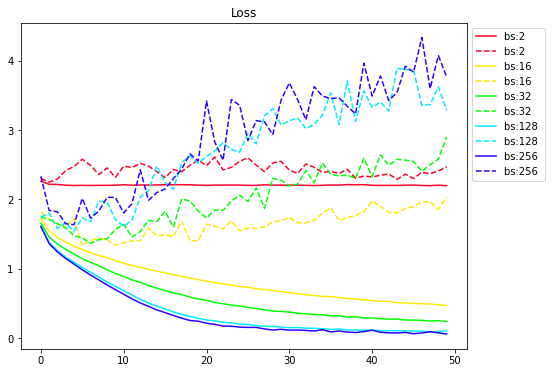

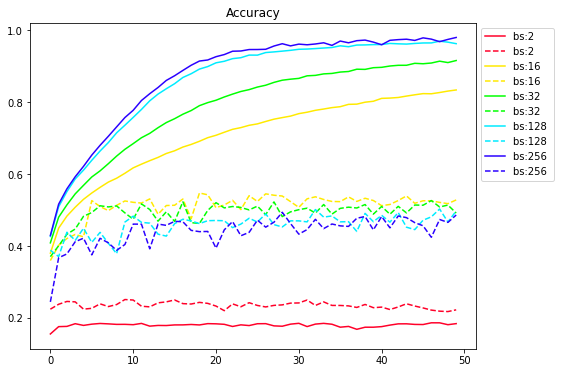

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()